# KNN Multi-Class (Mask, No Mask, Incorrect Mask)

Things to consider:

- [ ] Curse of Dimensionality
- [ ] Overfitting 
- [ ] Dropping Highly Correlated Features
- [ ] Dropping null values
- [ ] Hyperparameter Tuning
    - [ ] Distance Metrics
    - [ ] KNN, K
    - [ ] Uniform V. Weighted
- [ ] More Performance Metrics

## Imports

In [1]:
# import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import os
import PIL
import cv2
import pickle
import time # for computation time assessment
%matplotlib inline
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


## Get Feature and Target Extraction

### Pickle Dataset

In [2]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in)

### Dataset Classification Distribution

In [ ]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# How much memory X features takes up
print("\n[INFO] image matrix: {:.2f}MB".format(
    X.nbytes / (1024 * 1000.0)))

# How much memory y target takes up
print("[INFO] target matrix: {:.2f}MB".format(
    y.nbytes / (1024 * 1000.0)))

# Data Matrix will serve as X
# How much memory data features takes up
print("[INFO] data/features matrix: {:.2f}MB".format(
    data.nbytes / (1024 * 1000.0)))

# Data numpy to dataframe
cols = [] # Get Column Names

for i in range(0, len(data[0])):
    cols.append("P" + str(i))
    
# cols.append("Mask") # Add Target Column Name
# for i in range(len(y)):
#     numpy_data[i] = np.insert(i, y[i])

numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

In [4]:
# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


# plt.figure(figsize=(20,10))
# columns = 5
# for i in range(5):
#     plt.subplot(5 / columns + 1, columns, i + 1)
#     plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')


Image Data Shape: (17687, 4096)
Image Data Shape Features: (17687, 4096)
Image Data Shape Target: (17687, 1)


### Split Train + Test, random_state

In [5]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  14149 
Length of our Testing data:  3538


## KNN No Hyperparameter Tuning

In [6]:
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

### Build and train KNN model

In [7]:
# Initialize KNN model
knn = OneVsRestClassifier(KNeighborsClassifier())

# Use training data to fit KNN model
knn.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [21]:
# make prediction on entire test data
%time
predictions = knn.predict(X_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


In [25]:
pickle_out = open("predictions_no_hyperparameter_tuning.pickle", "wb")
pickle.dump(predictions, pickle_out)
pickle_out.close()

## Performance Metrics for No Hyperparameter Tuning

In [23]:
import seaborn as sns # for confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

#### Accuracy

In [22]:
# 76.7%
# %time
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))
'''
No Hypertuning: 76.7% Accuracy
'''

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
KNN Accuracy: 0.767


'\nNo Hypertuning: 76.7% Accuracy\n'

#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7671000565291125')

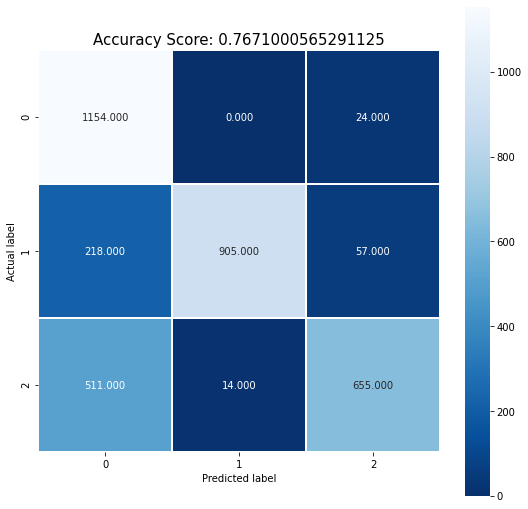

In [24]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

#### Precision

In [31]:
%time
print('KNN Precision: %.3f' % precision_score(y_test,predictions, average='micro'))
'''
No Hypertuning: 76.7% Precision
'''

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs
KNN Precision: 0.767


'\nNo Hypertuning: 76.7% Accuracy\n'

#### Recall

In [32]:
%time
print('KNN Recall: %.3f' % recall_score(y_test,predictions, average='micro'))
'''
No Hypertuning: 76.7% Recall
'''

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs
KNN Recall: 0.767


'\nNo Hypertuning: 76.7% Accuracy\n'

#### F1 Score

In [39]:
%time
print('KNN F1 Score: %.3f' % f1_score(y_test,predictions, average='micro'))
'''
No Hypertuning: 76.7% F1 Score
'''

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
KNN F1 Score: 0.767


'\nNo Hypertuning: 76.7% Accuracy\n'

## KNN Hyperparameter Tuning

In [43]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}" .format(np.mean(cv_scores)))

[0.7580554  0.77303561 0.7746678  0.77947413 0.76194515]
cv_scores mean:0.7694356182633942


### GridSearch for Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [3, 5, 10, 15, 25, 50, 100], 'metric': ['euclidean', 'manhattan', 'minkowski']}

%time
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
%time
#fit model to data
knn_gscv.fit(X_train, y_train.values.ravel())

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [ ]:
#check top performing n_neighbors value
%time
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
%time
knn_gscv.best_score_

In [ ]:
pickle_out = open("predictions_hyperparameter_gscv.pickle", "wb")
pickle.dump(knn_gscv, pickle_out)
pickle_out.close()

pickle_out = open("predictions_hyperparameter_cv.pickle", "wb")
pickle.dump(knn_cv, pickle_out)
pickle_out.close()

## Test Best Parameters 

In [ ]:
# create new a knn model with best params
knn2 = KNeighborsClassifier(**best_params_)

%time
#fit model to data
knn2.fit(X_train, y_train.values.ravel())

# make prediction on entire test data
%time
predictions = knn2.predict(X_test)

### Saving & Exporting KNN model for future use

In [ ]:
# # NAME OF MODEL
# filename = 'knn-face-mask-detection-model.pkl'

# # EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
# pickle.dump(knn, open(filename, 'wb'))